### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pathlib import Path
import re

### Loading the dataset

In [143]:
## Specifying the path for target columns
input_dir = Path("/content/drive/MyDrive/datasets/bbc-fulltext (document classification)/bbc/")

## Saving the target class categories in the categories column
categories = [category.name for category in input_dir.iterdir() if category.is_dir()]
categories

['politics', 'sport', 'business', 'entertainment', 'tech']

#### **Loading the text files and storing them as features for the model in variable X**
#### **Storing the directory name as label for the each of the feature**

In [144]:
X=[]
y=[]
for cat in categories:
    for feature_path in (input_dir/cat).iterdir():
        if feature_path.is_file():
            #Storing the category label
            y.append(cat)
            #storing the text features
            X.append(open(feature_path,encoding="utf8", errors='ignore').read())

### Creating the DataFrame from dataset

In [145]:
data=pd.DataFrame({
    "text":X,
    "label":y
})

## **Data Exploration**

#### **How data Looks like**

In [146]:
data.head()

text     label
0  Brown comes out shooting\n\nLabour may have ab...  politics
1  Nuclear strike 'key terror risk'\n\nThe UK and...  politics
2  'More to do' on adult literacy\n\nThe governme...  politics
3  Tutu's Guantanamo release call\n\nArchbishop D...  politics
4  Parties' plans for council tax\n\nAnger at cou...  politics

#### **The number of rows and columns present inside the dataset**

In [147]:
data.shape

(2263, 2)

#### **Checking the non-null count, column name and size of the dataset**

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2263 non-null   object
 1   label   2263 non-null   object
dtypes: object(2)
memory usage: 35.5+ KB


### **Distribution of the target column**

In [149]:
data['label'].value_counts()

label
business         540
sport            519
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

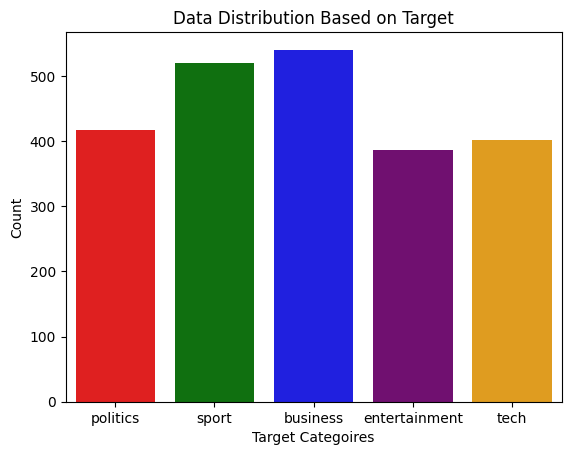

In [150]:
sns.countplot(x='label',data=data,palette=['red','green','blue','purple','orange'],hue='label')
plt.title("Data Distribution Based on Target")
plt.xlabel("Target Categoires")
plt.ylabel("Count")
plt.show()

## **Data Preprocessing**


#### Checking missing values from the dataset

In [151]:
data.isna().sum()

text     0
label    0
dtype: int64

#### Checking the Duplicate records present inside the dataset

In [152]:
data.duplicated().sum()

136

#### Removing the duplicate entries from the dataset

In [153]:
data.drop_duplicates(keep=False,inplace=True)

### **Data Cleaning**

##### Generating the word cloud before preprocessing

In [154]:
from wordcloud import WordCloud

#### Calculating Frequency of Words

In [155]:
def frequency_words(text):
  words_count=[]
  for word in text.split():
    words_count.extend(word)
  #Generating word frequences using value_counts in word-list
  word_freq=pd.Series(words_count).value_counts()
  word_freq[:100]#displaying top 100 words
  return word_freq

In [156]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [157]:
freq=frequency_words(data.text.str)
freq

the            39992
to             22165
of             17630
and            15995
a              15441
               ...  
habit.             1
persuaded."        1
exempted           1
criminals?"        1
2,838th            1
Name: count, Length: 63198, dtype: int64

#### WordCloud representing frequency of each word in all the docs

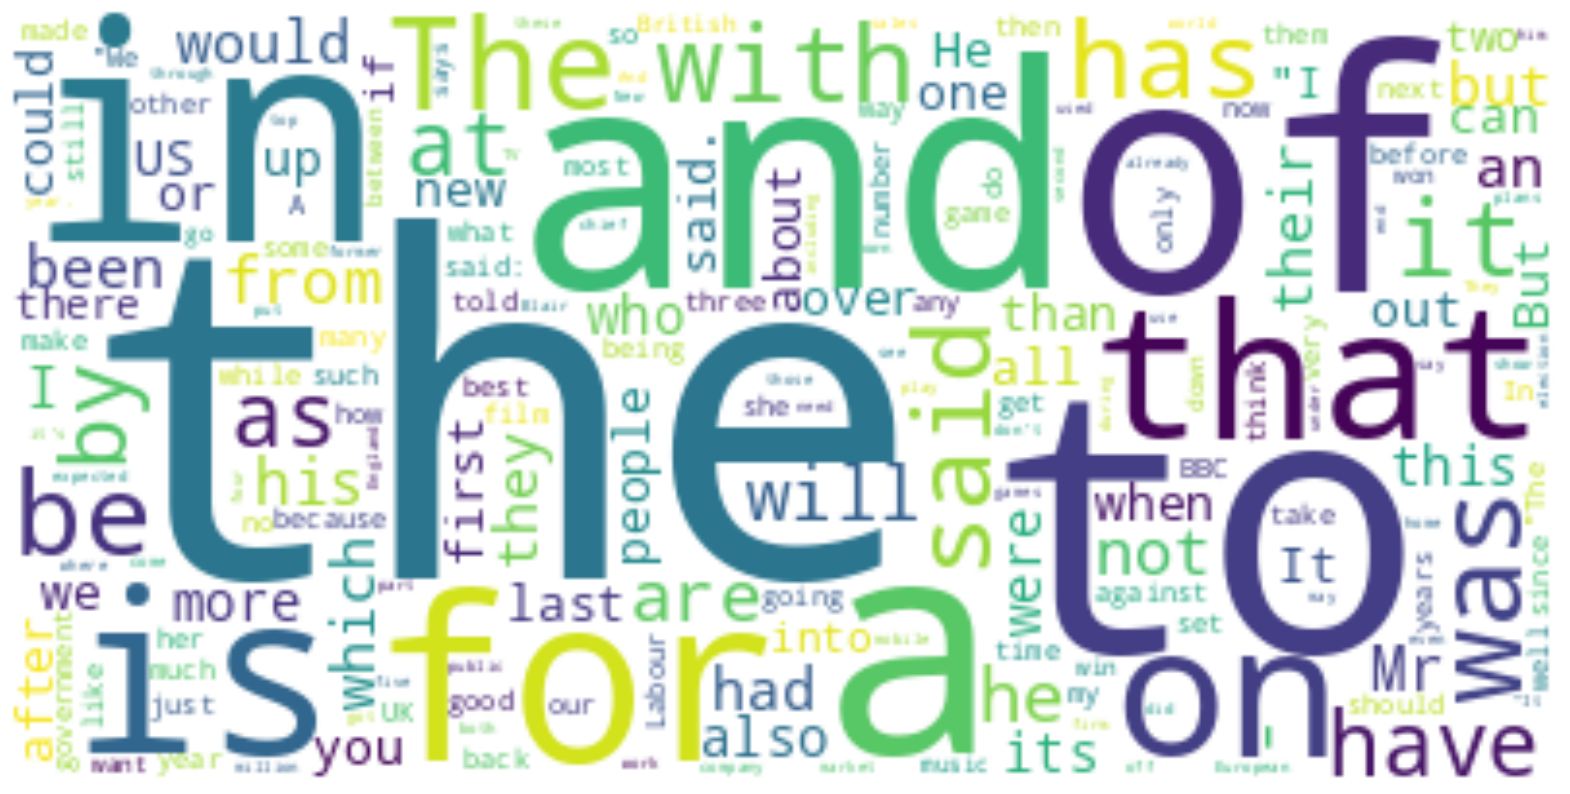

In [158]:
plt.figure(figsize=(20,20))
wordc=WordCloud(max_words=200,width=400,height=200,background_color='white').generate_from_frequencies(freq)
plt.axis('off')
plt.imshow(wordc,interpolation='bilinear')
plt.show()

#### Word cloud for Busniess text docs

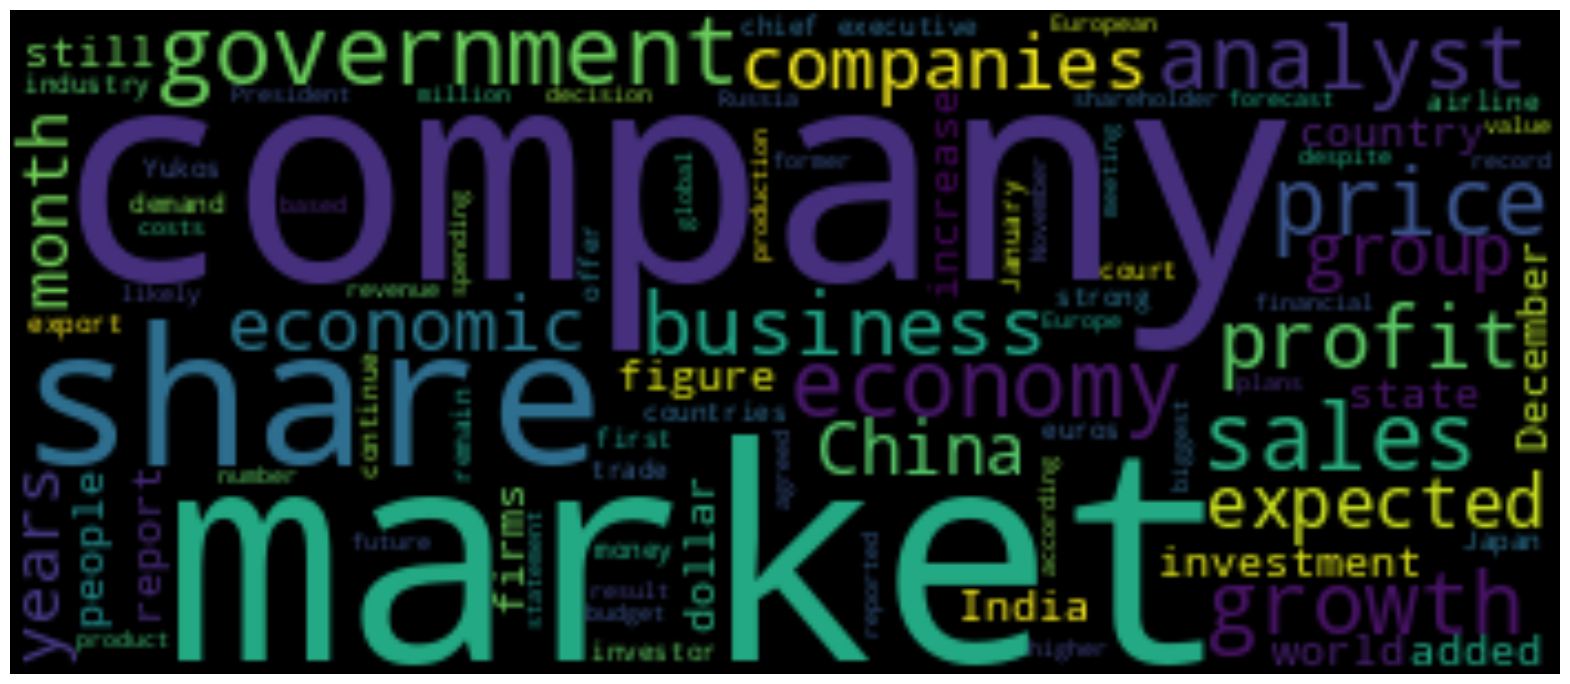

In [159]:
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500,width=350,height=150,min_word_length=5).generate(" ".join(data[data.label=='business'].text))
plt.axis('off')
plt.imshow(Wc,interpolation='bilinear')
plt.show()

#### Word cloud for entertainment text docs

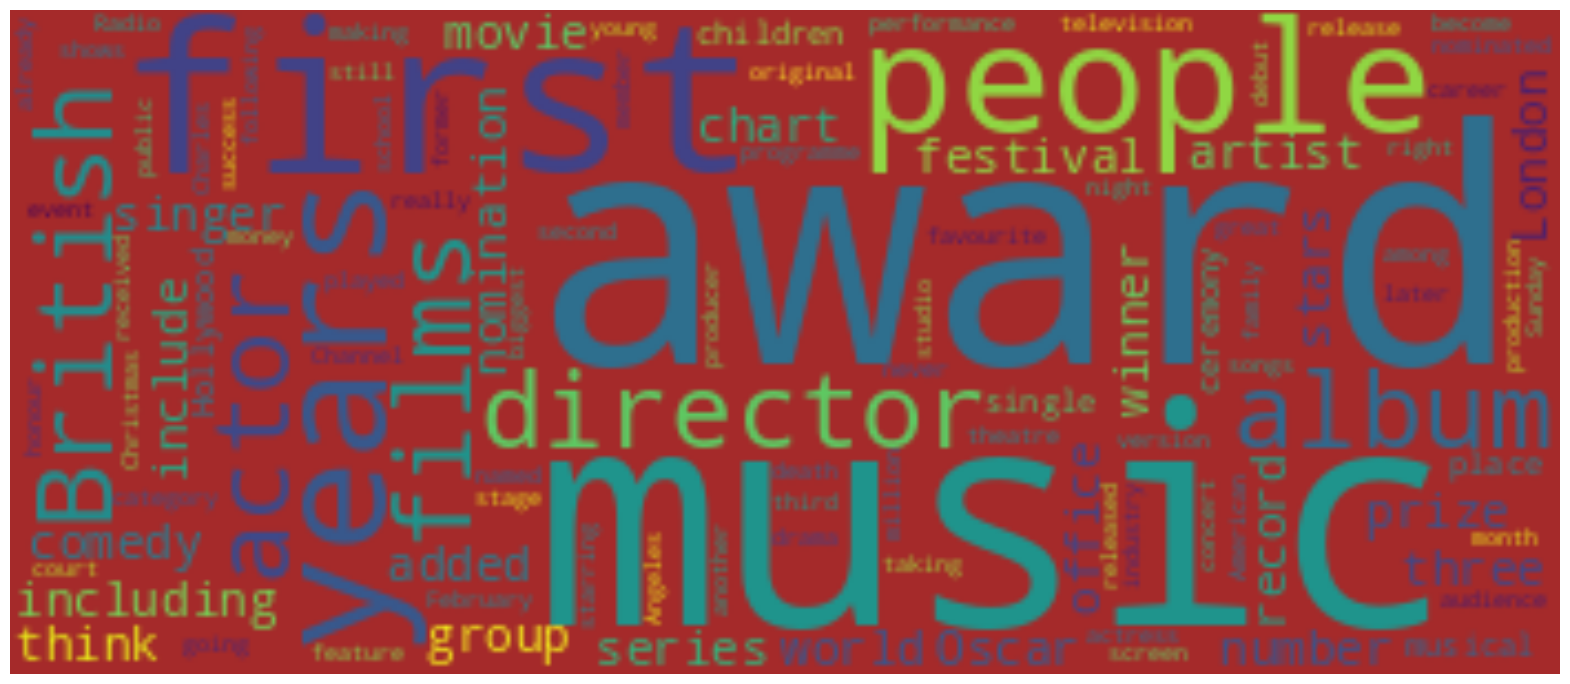

In [160]:
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500,width=350,height=150,min_word_length=5,background_color='brown').generate(" ".join(data[data.label=='entertainment'].text))
plt.axis('off')
plt.imshow(Wc,interpolation='bilinear')
plt.show()

#### Word cloud for politics text docs

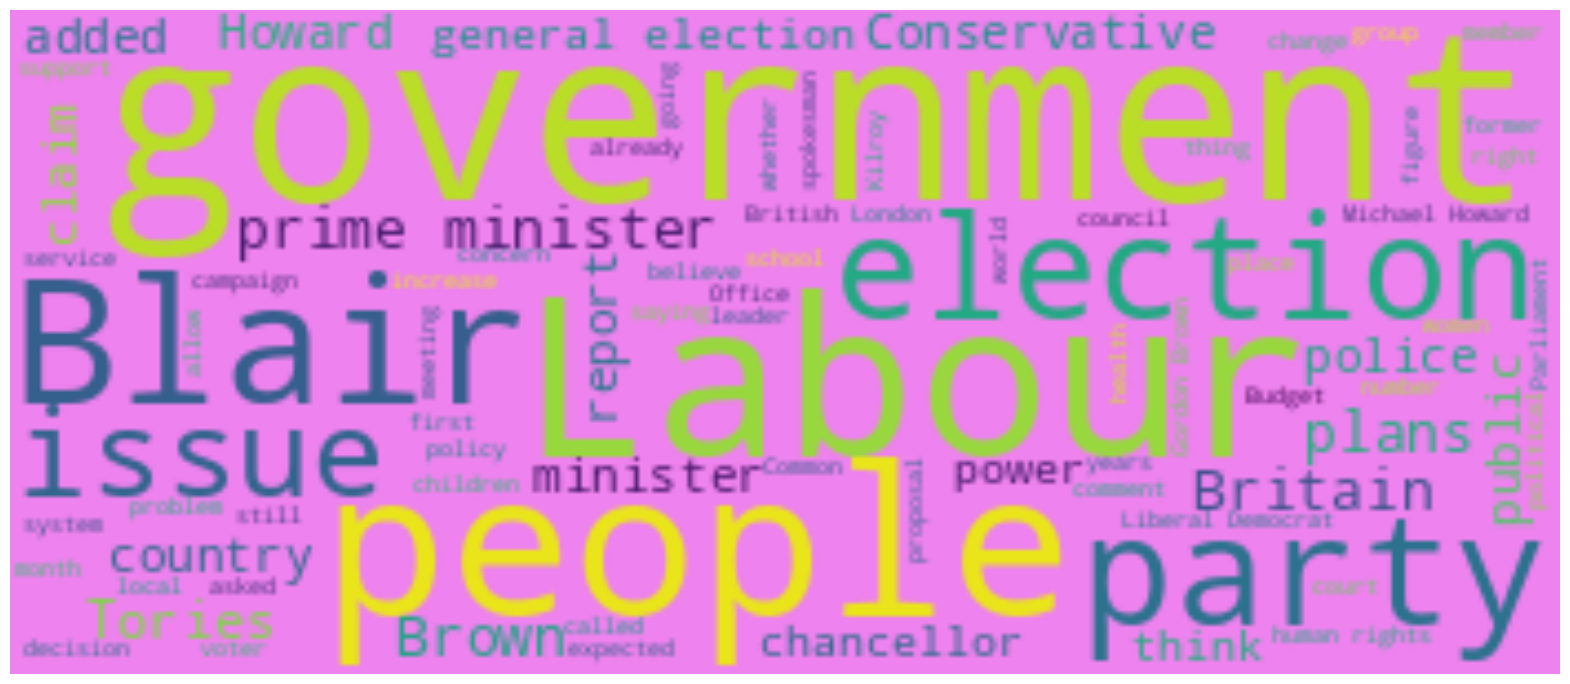

In [161]:
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500,width=350,height=150,min_word_length=5,background_color='violet').generate(" ".join(data[data.label=='politics'].text))
plt.axis('off')
plt.imshow(Wc,interpolation='bilinear')
plt.show()

#### Word cloud for sport text docs

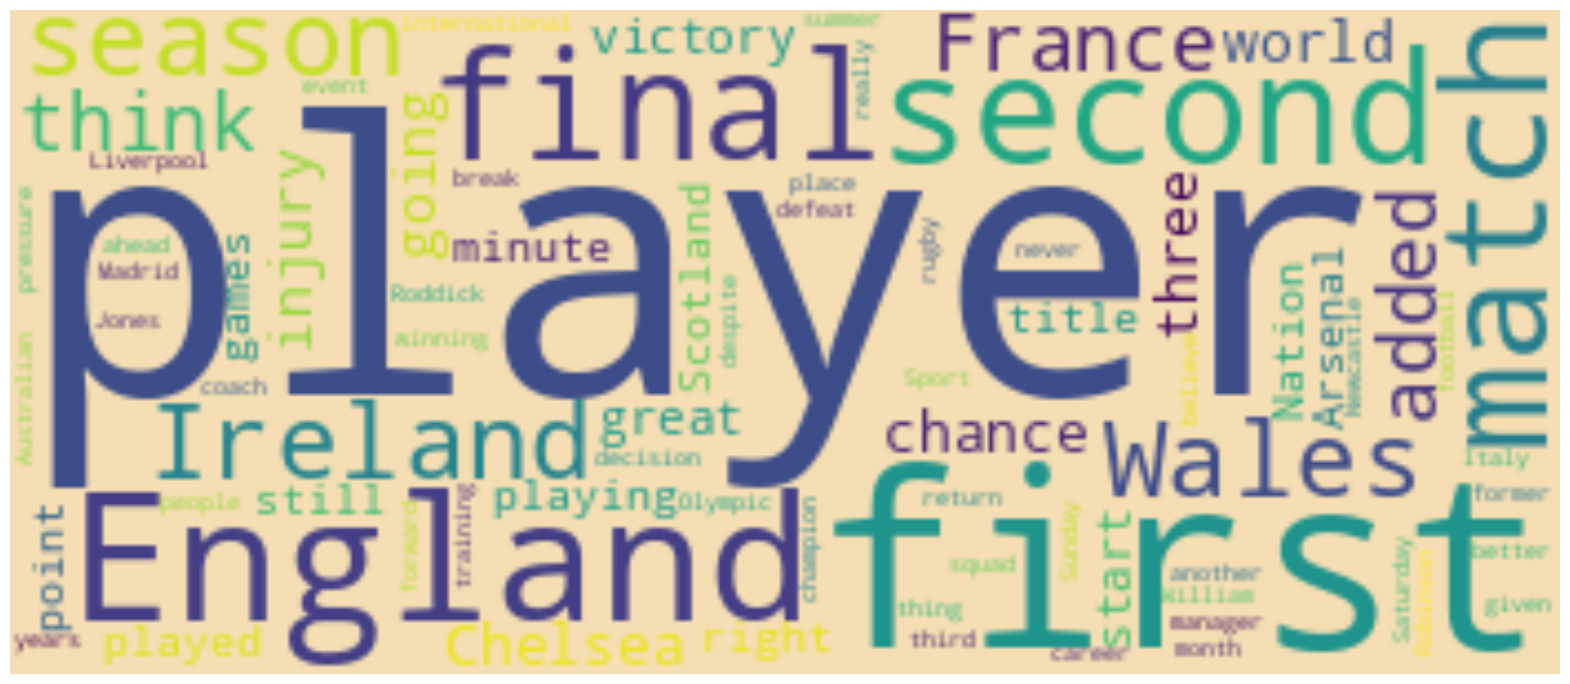

In [162]:
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500,width=350,height=150,min_word_length=5,background_color='wheat').generate(" ".join(data[data.label=='sport'].text))
plt.axis('off')
plt.imshow(Wc,interpolation='bilinear')
plt.show()

#### Word cloud for tech docs

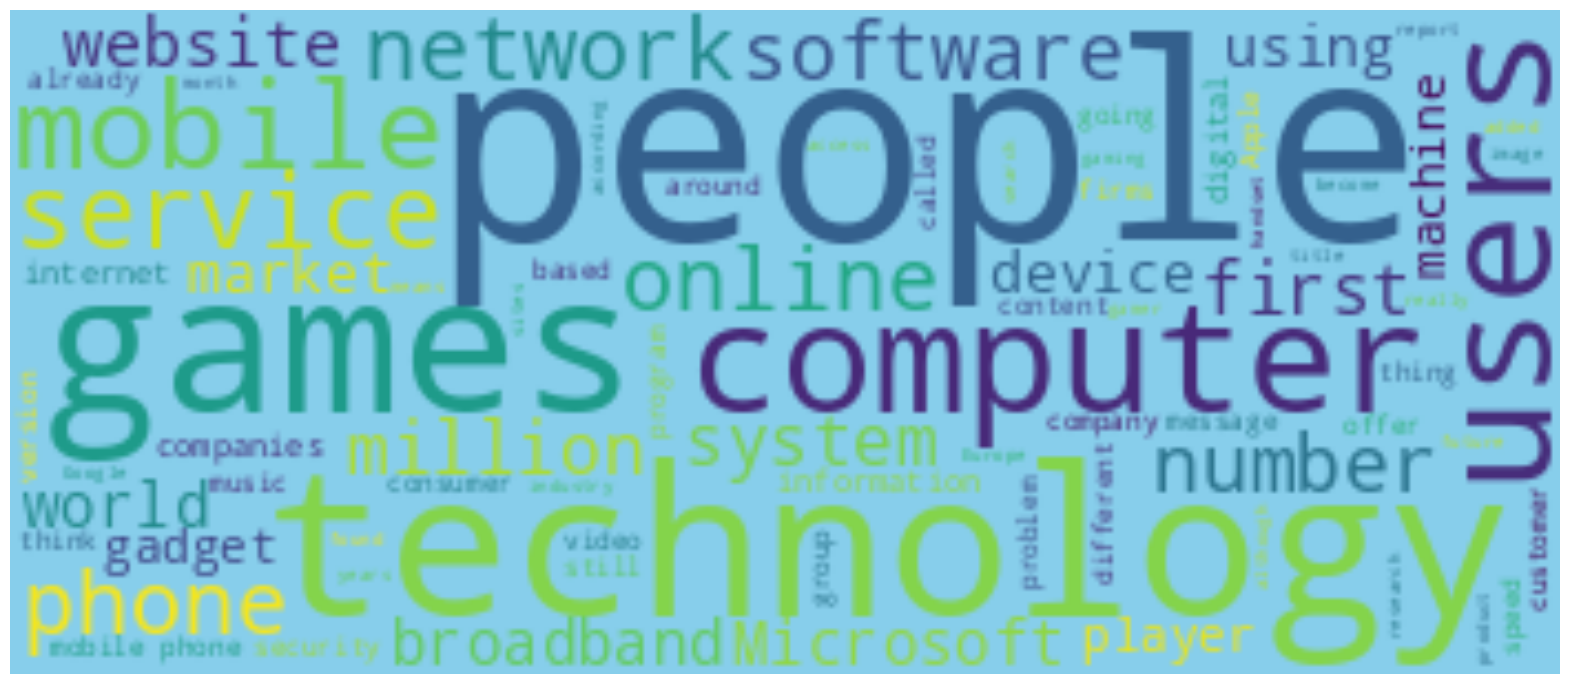

In [163]:
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500,width=350,height=150,min_word_length=5,background_color='skyblue').generate(" ".join(data[data.label=='tech'].text))
plt.axis('off')
plt.imshow(Wc,interpolation='bilinear')
plt.show()

## **Data Cleaning**

#### Removing new line "\n" from the text

In [164]:
def cleaner_text(text):
  #removing the html tags
  text=re.sub(r"\n"," ",text)
  return text

In [165]:
data['text']=data['text'].apply(cleaner_text)

### Removing the HTML Tags from the text

In [166]:
def html_cleaner(text):
  #removing the html tags
  text=re.sub(r"<.*?>"," ",text)
  return text

In [167]:
data['text']=data['text'].apply(html_cleaner)

#### Removing Punctuation marks

In [168]:
def remove_marks(text):
  text=re.sub(r"[!\"#$%&\\'()*+,-\.\/:;<=>\?\]\^_\`{\|}\]\0-9]+"," ",text)
  return text

In [169]:
data['text']=data['text'].apply(remove_marks)

#### Removing white spaces and backquotes

In [170]:
def remove_whites(text):
  text=re.sub("(\'s)|([`'])+"," ",text)
  return text

In [171]:
data['text']=data['text'].apply(remove_whites)

#### Chatword Treatment and removing words if length is equal to 1

In [172]:
dd={
    "US":'united states',
    "UK":'united kingdom',
    "BA":'British Airways',
    "D":'had',
    "S":'is',
    "LL":'will',
    "VE":'have',
    "M":'am',
    "U":'you',
    "T":'not',
    "COULDN":'could',
    "SHOULDN":'should',
    "WOULDN":'would',
    "DIDN":'did',
    "DON":'do',
    "DOESN":'does',
    "AREN":'are',
    "WASN":'was',
    "AIN":'is',
    "ISN":'is',
    'TKTS':'tickets',
    'USF':'useful',
    'C':'see',
    'U':'you',
    "M":'am',
    "VE":'have',
    "LL":'will',
    "T":'not',
    "RE":'are',
    '1':'one',
    '2':'two',
    '3':'three',
    '4':'four',
    '5':'five',
    '6':'six',
    '7':'seven',
    '8':'eight',
    '9':'nine',
    '10':'ten',
    'ND':'second',
     "MG":'milligram',
     "XS":"times",
    "X":"times",

}
def chat_treatment(text):
    new_text=[]
    for word in text.split():
        if len(word)>1:
            if word.upper() in dd.keys():
                new_text.append(dd[word.upper()])
            else:
                new_text.append(word)
    return " ".join(new_text)

In [173]:
data['text']=data['text'].apply(chat_treatment)

## **Removing stopwords**

In [174]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [175]:
from nltk.corpus import stopwords
from nltk import word_tokenize
stops=stopwords.words('english')

In [176]:
def remove_stop_words(text):
  my_text=[]
  #lower-casing
  text=text.lower()
  tokens=word_tokenize(text)
  for word in tokens:
    if word not in stops:
      my_text.append(word)
  return " ".join(my_text)

In [177]:
data['text']=data['text'].apply(remove_stop_words)

### Performing Lemmatization using Spacy

In [178]:
import spacy
nlp=spacy.load('en_core_web_sm')

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [179]:
def lemmatization_text(text):
  my_text=[]
  doc=nlp(text)
  for token in doc:
    my_text.append(token.lemma_)
  return " ".join(my_text)

In [180]:
data['text']=data['text'].apply(lemmatization_text)


## **Word cloud after preprocessing of the dataset**

#### Business doc text

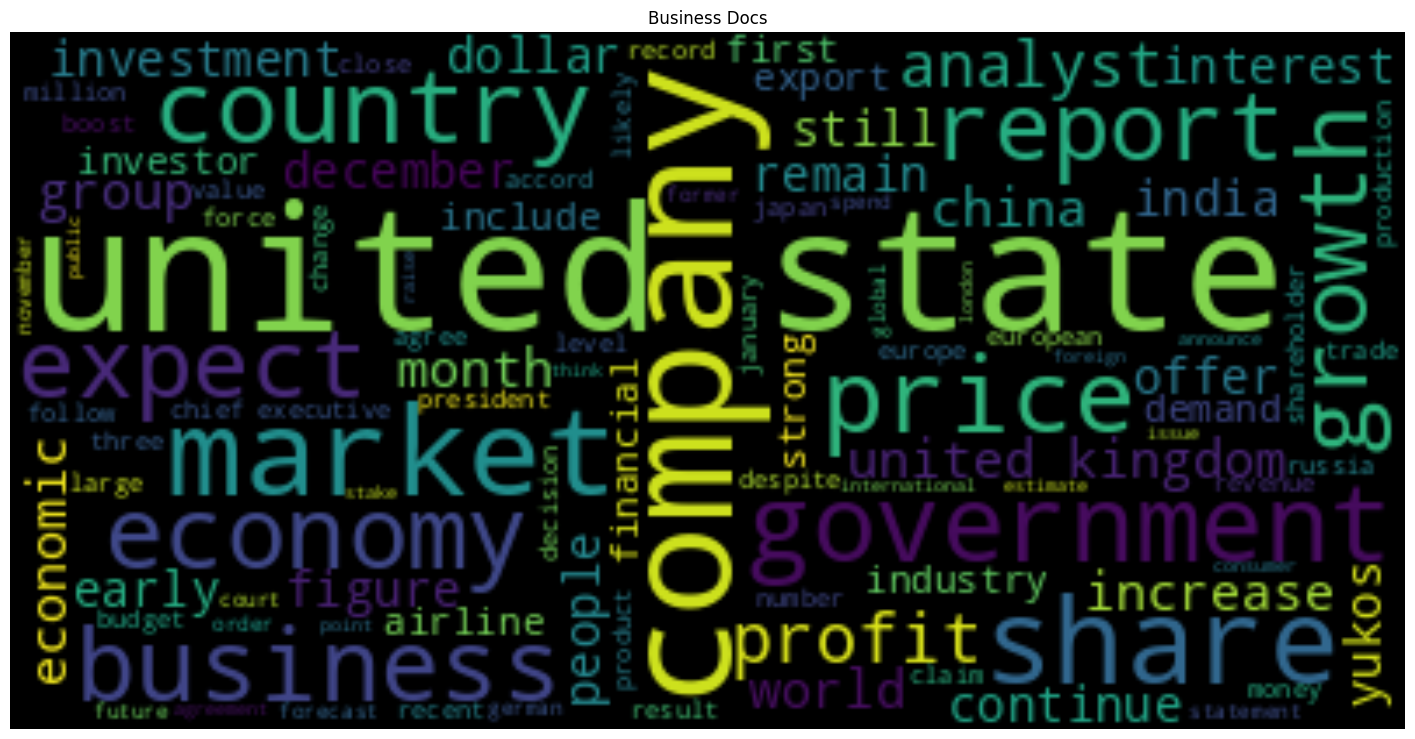

In [181]:
plt.figure(figsize=(18,18))
WordCld=WordCloud(max_words=500,width=400,height=200,min_word_length=5).generate(" ".join(data[data.label=='business'].text))
plt.title('Business Docs')
plt.axis('off')
plt.imshow(WordCld,interpolation='bilinear')
plt.show()

#### Wordcloud for entertainmen doc

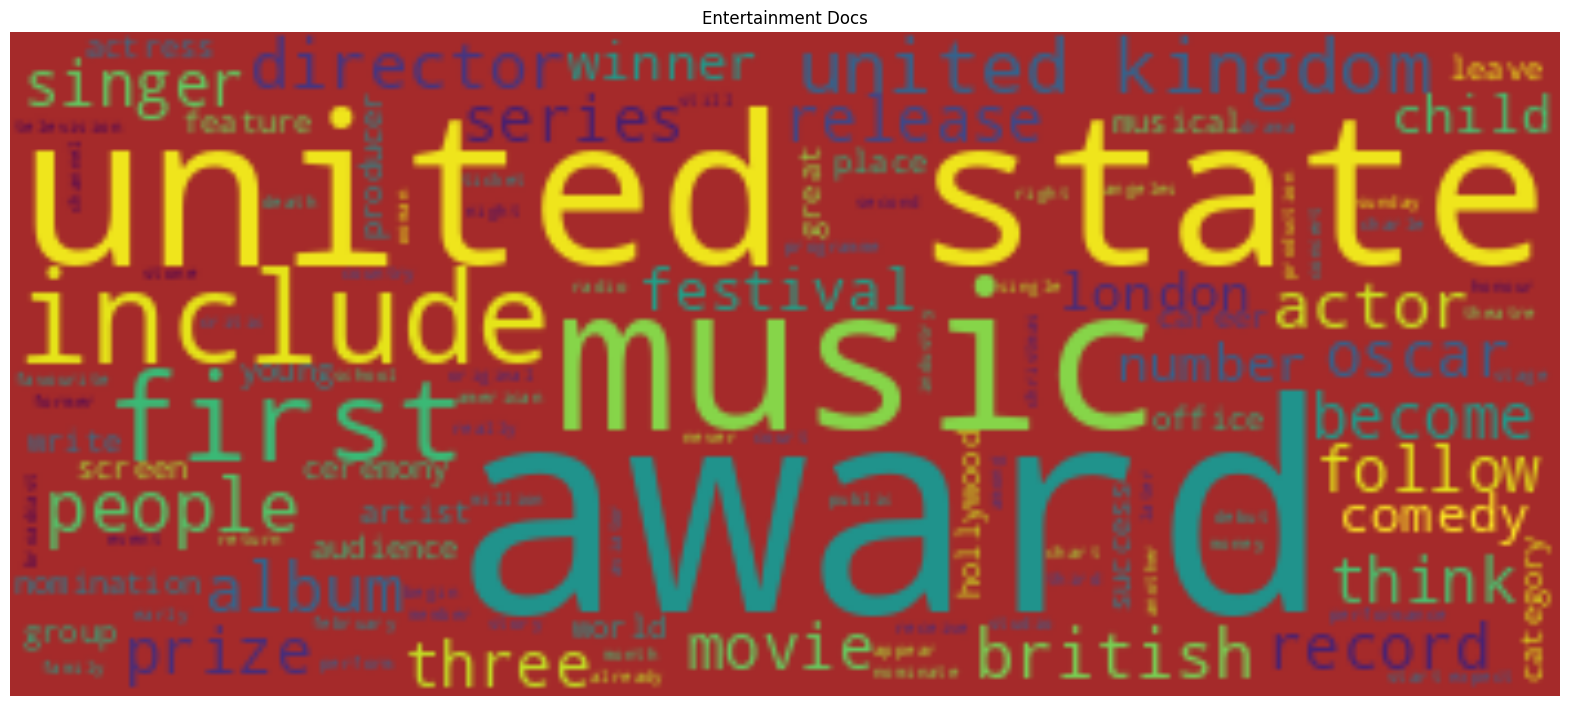

In [182]:
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500,width=350,height=150,min_word_length=5,background_color='brown').generate(" ".join(data[data.label=='entertainment'].text))
plt.axis('off')
plt.title('Entertainment Docs')
plt.imshow(Wc,interpolation='bilinear')
plt.show()

#### Word cloud for politics text docs

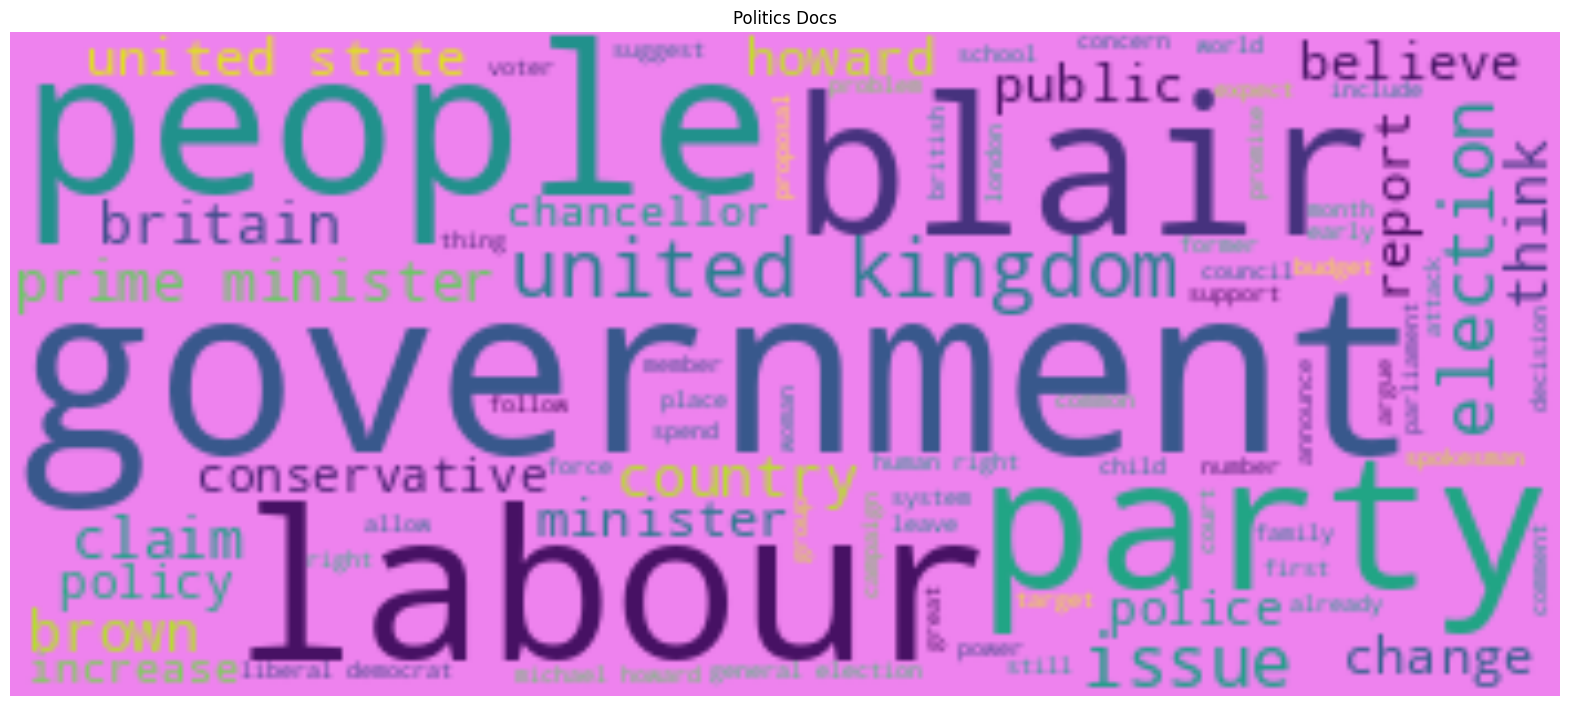

In [183]:
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500,width=350,height=150,min_word_length=5,background_color='violet').generate(" ".join(data[data.label=='politics'].text))
plt.axis('off')
plt.title('Politics Docs')
plt.imshow(Wc,interpolation='bilinear')
plt.show()

#### Word cloud for Sport text docs

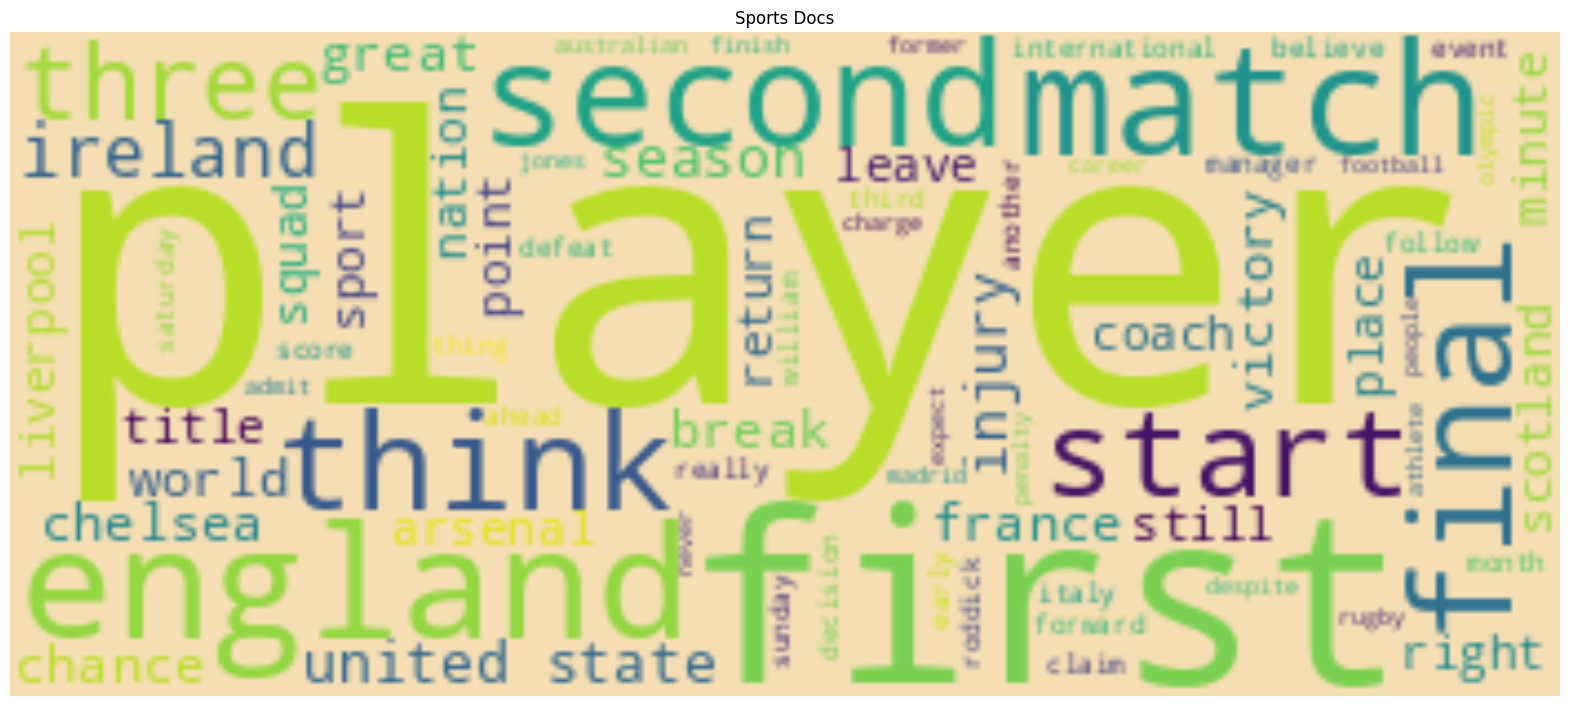

In [184]:
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500,width=350,height=150,min_word_length=5,background_color='wheat').generate(" ".join(data[data.label=='sport'].text))
plt.axis('off')
plt.title('Sports Docs')
plt.imshow(Wc,interpolation='bilinear')
plt.show()

#### Word cloud for Technology text docs

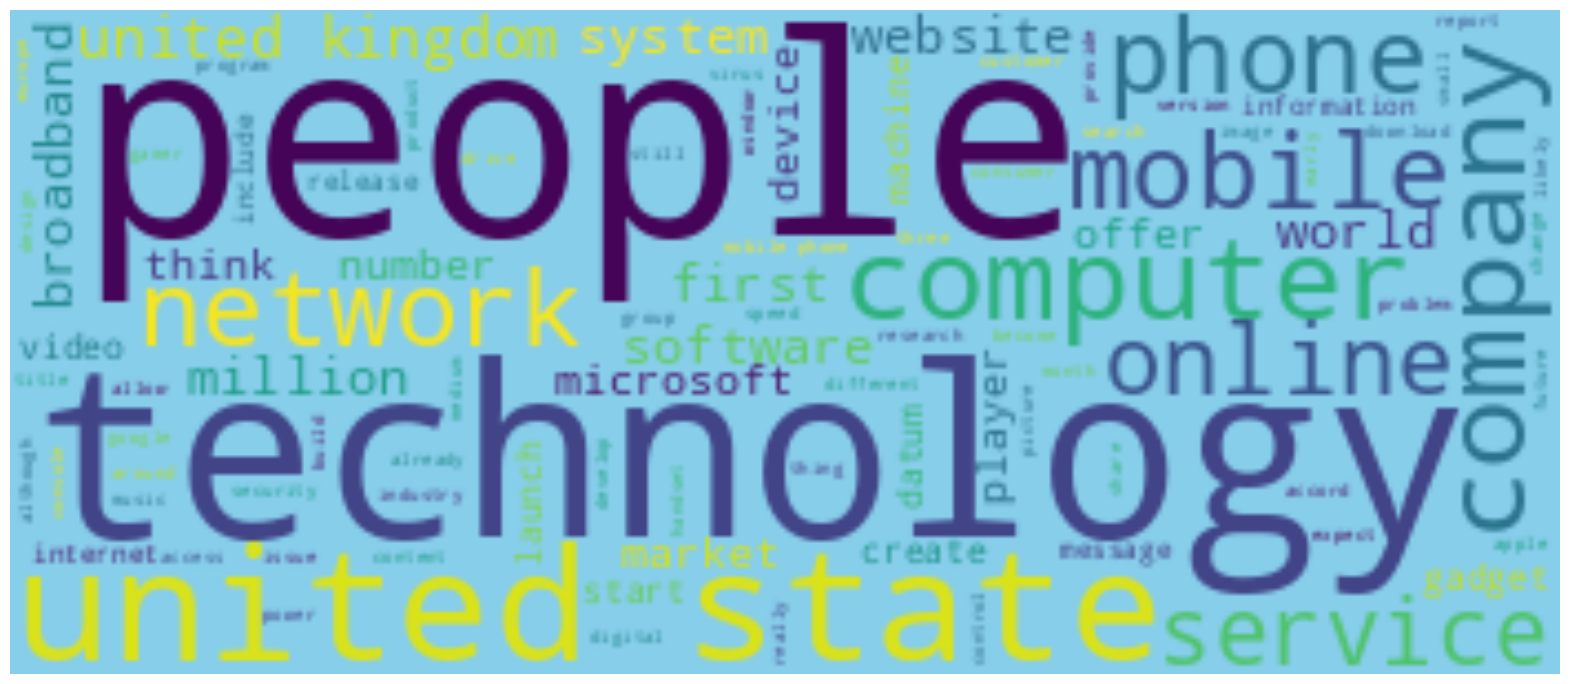

In [185]:
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500,width=350,height=150,min_word_length=5,background_color='skyblue').generate(" ".join(data[data.label=='tech'].text))
plt.axis('off')
plt.imshow(Wc,interpolation='bilinear')
plt.show()

### Feature Engineering

#### Label Encoding the target column

In [186]:
data['label']=data['label'].map(
    {
        'business':0,
     'entertainment':1,
     'politics':2,
     'sport':3,
     'tech':4
        }
    )

## **Splitting the data into train,test and validation**

In [187]:
from sklearn.model_selection import train_test_split

train_text, temp_text, train_labels, temp_labels = train_test_split(data['text'], data['label'],
                                                                    random_state = 42,
                                                                    test_size = 0.2,
                                                                    stratify = data['label'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state = 42,
                                                                test_size = 0.5,
                                                                stratify = temp_labels)

## **Loading the pretrained model Bert**

# !pip install transformers torch datasets tensorflow

In [188]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from transformers import AutoModel, BertTokenizerFast

In [189]:
bert = AutoModel.from_pretrained('bert-base-uncased',num_labels=5)
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [190]:
bert

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

#### What is the fixed length of the review to keep

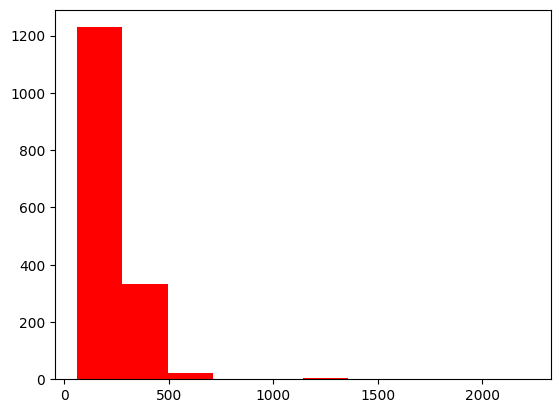

In [191]:
train_lens = [len(str(i).split()) for i in train_text]
plt.hist(train_lens,color='red')

plt.show()

#### Making input size fixed for the Bert Model

In [192]:
pad_len=350

# Convert Series to list of strings, handling potential non-string elements
train_text_list = [str(i) for i in train_text.tolist()]
val_text_list = [str(i) for i in val_text.tolist()]
test_text_list = [str(i) for i in test_text.tolist()]

# tokenize and encode sequences
tokens_train = tokenizer.batch_encode_plus(
    train_text_list,  # Use the converted list of strings
    max_length = pad_len,
    pad_to_max_length = True,
    truncation = True
)

# Repeat the same process for val_text_list and test_text_list
tokens_val = tokenizer.batch_encode_plus(
    val_text_list,
    max_length = pad_len,
    pad_to_max_length = True,
    truncation = True
)

tokens_test = tokenizer.batch_encode_plus(
    test_text_list,
    max_length = pad_len,
    pad_to_max_length = True,
    truncation = True
)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


### Converting the data into tensors

In [193]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [194]:
#for pytorch
import torch
import torch.nn as nn
device = torch.device("cuda")

### Example of Sequences

In [195]:
train_seq

tensor([[  101, 12085,  8730,  ...,  2100,  9004,   102],
        [  101, 17117,  4895,  ...,     0,     0,     0],
        [  101,  7922,  7358,  ...,     0,     0,     0],
        ...,
        [  101,  5712,  7041,  ...,     0,     0,     0],
        [  101, 18856, 28418,  ...,     0,     0,     0],
        [  101,  2602,  2071,  ...,     0,     0,     0]])

### Creating the dataloader for preparing data for the bert model

In [196]:

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

### freeze the pretrained layers except the classification layers which will be fine-tunned

In [197]:
# freeze the BERT architecture
for param in bert.parameters():
    param.requires_grad = False

In [198]:
categories

['politics', 'sport', 'business', 'entertainment', 'tech']

#### defining new layers such as Classification layers Fpr Finetuning

In [199]:
class BERT_architecture(nn.Module):

    def __init__(self, bert):

      super(BERT_architecture, self).__init__()

      self.bert = bert

      # dropout layer
      self.dropout = nn.Dropout(0.2)

      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)

      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,len(categories)) # 5 means : 5 outputs: either 'politics', 'sport', 'business', 'entertainment', 'tech'

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1) #to find predicted class with maximum prob

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model
      _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)

      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)

      # apply softmax activation
      x = self.softmax(x)

      return x

### Pass the pre-trained BERT to our define architecture

In [200]:
model = BERT_architecture(bert)

# push the model to GPU
model = model.to(device)

In [201]:
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),lr = 1e-5)  # learning rate

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


### specifying class weight as balanced and display class weight of each

In [202]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_weights = compute_class_weight(class_weight = "balanced",
                                        classes = np.unique(train_labels),
                                        y = train_labels
                                     )
print("class weights are {} for {}".format(class_weights,np.unique(train_labels)))

class weights are [0.8536193  1.13309609 1.02379421 0.81017812 1.36068376] for [0 1 2 3 4]


## Specifying parameters for the training model

In [203]:
#wrap class weights in tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push weights to GPU
weights = weights.to(device)

# define loss function
# add weights to handle the "imbalance" in the dataset
cross_entropy  = nn.NLLLoss(weight=weights)

# number of training epochs
epochs = 25

### Function to train the model

In [204]:
def train():

  model.train()

  total_loss, total_accuracy = 0, 0

  # empty list to save model predictions
  total_preds=[]

  # iterate over batches
  for step,batch in enumerate(train_dataloader):

    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]

    sent_id, mask, labels = batch

    # clear previously calculated gradients
    model.zero_grad()

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)

  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

### Function for evaluating the model

In [205]:
def evaluate():

  print("\nEvaluating...")

  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0

  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):

    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:

      # elapsed = format_time(time.time() - t0)

      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():

      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader)

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

### Calling both of the function for training and evaluation

In [206]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):

    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    #train model
    train_loss, _ = train()

    #evaluate model
    valid_loss, _ = evaluate()

    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print('\nTraining Loss: {}'.format(train_loss))
    print('Validation Loss: {}'.format(valid_loss))


 Epoch 1 / 25

Evaluating...

Training Loss: 1.6048203587532044
Validation Loss: 1.5983255079814367

 Epoch 2 / 25

Evaluating...

Training Loss: 1.5873681998252869
Validation Loss: 1.5810812541416712

 Epoch 3 / 25

Evaluating...

Training Loss: 1.5736136054992675
Validation Loss: 1.5673651354653495

 Epoch 4 / 25

Evaluating...

Training Loss: 1.563172583580017
Validation Loss: 1.555567979812622

 Epoch 5 / 25

Evaluating...

Training Loss: 1.5532174181938172
Validation Loss: 1.5447560719081335

 Epoch 6 / 25

Evaluating...

Training Loss: 1.5455010104179383
Validation Loss: 1.534384982926505

 Epoch 7 / 25

Evaluating...

Training Loss: 1.5308458065986634
Validation Loss: 1.5235167230878557

 Epoch 8 / 25

Evaluating...

Training Loss: 1.5305767440795899
Validation Loss: 1.5139044863837106

 Epoch 9 / 25

Evaluating...

Training Loss: 1.5083320260047912
Validation Loss: 1.5025523390088762

 Epoch 10 / 25

Evaluating...

Training Loss: 1.4922961568832398
Validation Loss: 1.492938501

### Loading the weights from the model

### get predictions for test data in smaller batches

In [208]:
batch_size = 16  # Adjust this value as needed
preds_list = []
with torch.no_grad():
    for i in range(0, test_seq.size(0), batch_size):
        batch_seq = test_seq[i: i + batch_size].to(device)
        batch_mask = test_mask[i: i + batch_size].to(device)
        batch_preds = model(batch_seq, batch_mask)
        preds_list.append(batch_preds.detach().cpu().numpy())

# Concatenate the predictions from all batches
preds = np.concatenate(preds_list, axis=0)

### Evaluation using various metrics

In [209]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [210]:
pred = np.argmax(preds, axis = 1)
print(classification_report(test_y, pred))


              precision    recall  f1-score   support

           0       0.79      0.72      0.76        47
           1       0.90      0.72      0.80        36
           2       0.91      0.74      0.82        39
           3       0.92      0.96      0.94        49
           4       0.53      0.83      0.65        29

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.79       200
weighted avg       0.83      0.80      0.81       200



In [211]:
acc=accuracy_score(test_y, pred)
print("Accuracy-Score:",acc)

Accuracy-Score: 0.8


### Saving the Model

In [221]:
torch.save(model.state_dict(), '/content/drive/MyDrive/datasets/bbc-fulltext (document classification)/bbc/bert_model.pth')

## Loading the Saved model

In [222]:
# Load the saved model weights
model.load_state_dict(torch.load('/content/drive/MyDrive/datasets/bbc-fulltext (document classification)/bbc/bert_model.pth'))

# Set the model to evaluation mode
model.eval()

<ipython-input-222-ddbdd306e2a5>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/datasets/bbc-fulltext (document cl

BERT_architecture(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

Confusion-Matrix:
 [[34  0  2  0 11]
 [ 1 26  1  3  5]
 [ 6  0 29  1  3]
 [ 0  0  0 47  2]
 [ 2  3  0  0 24]]


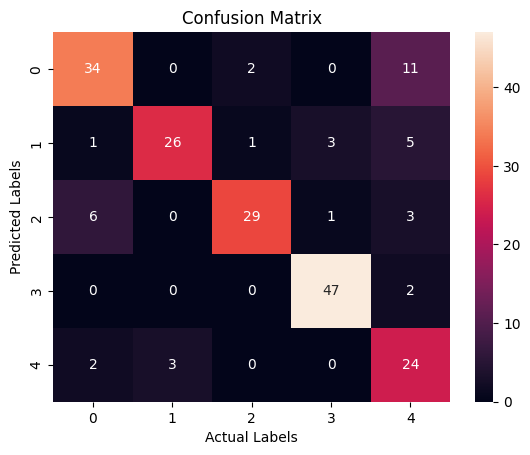

In [232]:
cm=confusion_matrix(test_y, pred)
print("Confusion-Matrix:\n",cm)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")
plt.show()

### Classification Report

In [234]:
crr=classification_report(test_y, pred)
print(crr)

              precision    recall  f1-score   support

           0       0.79      0.72      0.76        47
           1       0.90      0.72      0.80        36
           2       0.91      0.74      0.82        39
           3       0.92      0.96      0.94        49
           4       0.53      0.83      0.65        29

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.79       200
weighted avg       0.83      0.80      0.81       200



### Testing Model

In [213]:
def classify_text_file(file_path):
  """
  Loads a text file, preprocesses it, and classifies its content using the trained model.

  Args:
    file_path: Path to the text file.

  Returns:
    A string representing the predicted category.
  """
  try:
    with open(file_path, 'r') as file:
      text = file.read()
  except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    return None

  # Preprocess the text (same steps as used during training)
  text = cleaner_text(text)
  text = html_cleaner(text)
  text = remove_marks(text)
  text = remove_whites(text)
  text = chat_treatment(text)
  text = remove_stop_words(text)
  text = lemmatization_text(text)

  # Tokenize and encode the text
  tokens = tokenizer.encode_plus(
      text,
      max_length=pad_len,
      pad_to_max_length=True,
      truncation=True,
      return_tensors='pt'
  )

  # Move tensors to the device (GPU if available)
  input_ids = tokens['input_ids'].to(device)
  attention_mask = tokens['attention_mask'].to(device)

  # Get model predictions
  with torch.no_grad():
    outputs = model(input_ids, attention_mask)
    predicted_class = torch.argmax(outputs, dim=1).item()

  # Map the predicted class index to the category label
  categories = {
      0: 'business',
      1: 'entertainment',
      2: 'politics',
      3: 'sport',
      4: 'tech'
  }
  predicted_category = categories[predicted_class]

  return predicted_category

### Testing model by passing the text document

In [214]:

file_path = '/content/drive/MyDrive/datasets/bbc-fulltext (document classification)/bbc/politics/001.txt'  # Replace with file path
predicted_label = classify_text_file(file_path)
print(f"Predicted category for Text-doc:: {predicted_label}")

Predicted category for Text-doc:: politics


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [215]:
file_path = '/content/Home.pdf'
print(f"Predicted category for Text-doc:: {predicted_label}")

Predicted category for Text-doc:: politics


### Applying Machine learning Model TFIdf Vectorizer for text representation

In [216]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

### Splitting the data into train and test

In [217]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data['text'],data['label'],test_size=0.2,
                                               stratify=data['label'],random_state=42)

### Text represntation using TFidfVectorizer

****max_df=0.95 means those terms that will occur more than in 95% of the documents will be remove i.e. best way to remove most frequent terms*****

### Creating a pipeline for the Model building

In [218]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

### Creating the **pipeline**

In [225]:
pipe=Pipeline(
    [
        #list of tupples
        ('tfidf',TfidfVectorizer(ngram_range=(1,5),max_df=0.95, max_features=15000)),
        ('clf',LogisticRegression())
    ]
)


### Training the Pipeline (Logistic Regression)

In [226]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.95, max_features=15000,
                                 ngram_range=(1, 5))),
                ('clf', LogisticRegression())])

### Generating predictions

In [227]:
ypred=pipe.predict(x_test)

### Evaluating the model

In [230]:
acc=accuracy_score(y_test,ypred)
print("Accuracy-Score:",acc)
cm2=confusion_matrix(y_test,ypred)
print("Confusion-matrix:\n",cm2)
cr2=classification_report(y_test,ypred)
print("Classification-report:\n",cr2)

Accuracy-Score: 0.9824561403508771
Confusion-matrix:
 [[90  0  3  0  0]
 [ 1 70  0  0  0]
 [ 1  0 76  0  1]
 [ 0  0  0 98  0]
 [ 0  0  0  1 58]]
Classification-report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97        93
           1       1.00      0.99      0.99        71
           2       0.96      0.97      0.97        78
           3       0.99      1.00      0.99        98
           4       0.98      0.98      0.98        59

    accuracy                           0.98       399
   macro avg       0.98      0.98      0.98       399
weighted avg       0.98      0.98      0.98       399



### Heatmap of confusion-matrix

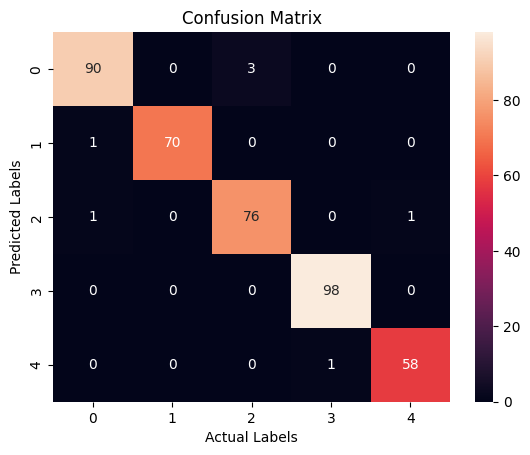

In [231]:
sns.heatmap(cm2,annot=True,fmt='d')
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
!pip install PyPDF2

### Saving the model

In [235]:
import pickle
pickle.dump(pipe,open('/content/drive/MyDrive/datasets/bbc-fulltext (document classification)/bbc/ml_lr.pkl','wb'))

#### Loading the saved model

In [236]:
load_model=pickle.load(open('/content/drive/MyDrive/datasets/bbc-fulltext (document classification)/bbc/ml_lr.pkl','rb'))

### Testing the model

In [255]:
load_model

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.95, max_features=15000,
                                 ngram_range=(1, 5))),
                ('clf', LogisticRegression())])

In [243]:
import PyPDF2

In [245]:
file_path = '/content/Home.pdf'

# Open the PDF file in binary read mode
with open(file_path, 'rb') as file:
    # Create a PDF reader object
    reader = PyPDF2.PdfReader(file)

    # Get the number of pages in the PDF
    num_pages = len(reader.pages)

    # Initialize an empty string to store the extracted text
    text = ""

    # Iterate over each page and extract text
    for page_num in range(num_pages):
        page = reader.pages[page_num]
        text += page.extract_text()

# Now you have the text content of the PDF file
print(text)


In [254]:

file_path = '/content/Home.pdf'

# Open the PDF file in binary read mode
with open(file_path, 'rb') as file:
    # Create a PDF reader object
    reader = PyPDF2.PdfReader(file)

    # Get the number of pages in the PDF
    num_pages = len(reader.pages)

    # Initialize an empty string to store the extracted text
    text = ""

    # Iterate over each page and extract text
    for page_num in range(num_pages):
        page = reader.pages[page_num]
        text += page.extract_text()

# Now you have the text content of the PDF file
print(text)


Registe rSign In 
• Home  
• News 
• Sport 
• Business  
• Innovation  
• Culture  
• Travel  
• Earth 
• Video  
• Live 
• Executive  Lounge  
• Technology  of Business  
• Women  at the Helm 
• Future  of Business  
 
Business  
 
 
 
Boeing  boss in last-ditch plea ahead  of strike  vote 
New chief  executive  tells staff that a strike  would  put the embattled  firm's  "recovery  in jeopardy".  
2 hrs ago 
Busines s 
 
 
 
US inflation  falls to lowest  in over three  years  
Consumer  prices  in the US rose 2.5%  over the 12 months  to August,  the slowest  pace  since  
February  2021.  
13 hrs ago 
Busines s 
 
 
 
Firm wins trademark  case against  easyJet  owner  
The airline's  owner  says he will appeal  against  the ruling,  which  found  there  was no infringement  
11 hrs ago 
Stoke  & Staffordshir e 
  
 
Rightmove  rejects  £5.6bn  offer from Murd och's  firm 
The property  listing  website  said the offer from its Australian  rival was 'wholly  opportunistic'.  
18 hrs

In [268]:
def classify_text_file_ML(file_path,loaded_model):
  """
  Loads a text file, preprocesses it, and classifies its content using the trained model.

  Args:
    file_path: Path to the text file.

  Returns:
    A string representing the predicted category.
  """
  text=""
  try:
    if file_path.endswith('.pdf'):
      with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
          text += page.extract_text()
          text=text.strip()
    else:
      with open(file_path, 'r') as file:
        text = file.read()
  except Except as e:
    print(e)
  text = cleaner_text(text)
  text = html_cleaner(text)
  text = remove_marks(text)
  text = remove_whites(text)
  text = chat_treatment(text)
  text = remove_stop_words(text)
  text = lemmatization_text(text)
  predicted_category = loaded_model.predict([text])
  categories = {
      0: 'business',
      1: 'entertainment',
      2: 'politics',
      3: 'sport',
      4: 'tech'
  }
  predicted_category = categories[predicted_category[0]]
  return predicted_category

  return text

In [269]:
file_path = '/content/Home.pdf'
predicted_label = classify_text_file_ML(file_path,load_model)
predicted_label
# print(f"Predicted category for Text-doc:: {predicted_label}")

'business'

In [270]:
file_path = '/content/drive/MyDrive/datasets/bbc-fulltext (document classification)/bbc/politics/001.txt'  # Replace with file path
predicted_label = classify_text_file_ML(file_path,load_model)
predicted_label

'politics'